In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pyreadr import read_r
import seaborn as sns
from seaborn import violinplot
import pickle

In [2]:
my_directory = ''

my_result_directory = ''

In [3]:
sns.set(font_scale=2)

In [4]:
n_methods = 13

n_partial = 20

n_metrics = 8

n_plots = 12

method_names = ['mean' , 'SoftImpute-5%' , 'SoftImpute-15%','SoftImpute-30%' ,
                'IterImpCorr-10' , 'IterImpCorr-50','IterImpCorr-150', 'IterImpMiss-10' , 'IterImpMiss-50','IterImpMiss-150'
               , 'IterImpMix-10' , 'IterImpMix-50','IterImpMix-150']

method_file_names = ['mean' , 'SoftImpute', 'SoftImpute','SoftImpute',
                    'corrIterativeImputer','corrIterativeImputer','corrIterativeImputer','missIterativeImputer','missIterativeImputer','missIterativeImputer',
                    'mixIterativeImputer','mixIterativeImputer','mixIterativeImputer']

suffixes =['.rds', '_perc5.rds', '_perc15.rds', '_perc30.rds',
          '_10.pkl','_50.pkl','_150.pkl','_10.pkl','_50.pkl','_150.pkl','_10.pkl','_50.pkl','_150.pkl']

var_names = ['bias_imp_clus2_FW', 'sd_imp_clus2_FW', 'auc_imp_clus2_FW', 'RMSE_imp_clus2_FW',
            'bias_imp_clus3_FW', 'sd_imp_clus3_FW', 'auc_imp_clus3_FW', 'RMSE_imp_clus3_FW']

title_names =[
             'Bias, Cluster c = 2',
             'Standard Deviation, Cluster c = 2',
             'BA, Cluster c = 2',
             'MSE, Cluster c = 2',
             'Bias, Cluster c = 3',
             'Standard Deviation, Cluster c = 3',
             'BA, Cluster c = 3',
             'MSE, Cluster c = 3',
             'Bias, Overall',
             'Standard Deviation, Overall',
             'BA, Overall',
         'MSE, Overall'
]

output_names = ['violin_bias_imp_clus2_FW.png', 'violin_sd_imp_clus2_FW.png',
                'violin_auc_imp_clus2_FW.png', 'violin_RMSE_imp_clus2_FW.png',
            'violin_bias_imp_clus3_FW.png', 'violin_sd_imp_clus3_FW.png', 'violin_auc_imp_clus3_FW.png', 'violin_RMSE_imp_block2_FW.png',
                'violin_bias_imp_FW.png', 'violin_sd_imp_FW.png', 'violin_auc_imp_FW.png', 'violin_RMSE_imp_FW.png']

In [5]:
my_result_dict = dict()

for i in range(n_metrics):
    temp_df_dict = dict()
    for j in range(n_methods):
        if j<4:
            temp_df = read_r(my_directory +var_names[i]+ '_' + method_file_names[j]+'_'+str(1)+suffixes[j])[None]
        else:
            temp_df = pd.DataFrame(pickle.load(open(my_directory +var_names[i]+ '_' + method_file_names[j]+'_'+str(1)+suffixes[j],'rb'))[None])
        if var_names[i][0] == 'R':
            temp_df = temp_df.applymap(lambda t: t**2)
        for k in range(2,n_partial+1):
            if j>=4:
                temp_df = pd.concat([temp_df, pd.DataFrame(pickle.load(open(my_directory +var_names[i]+ '_' + method_file_names[j]+'_'+str(k)+suffixes[j] , 'rb'))[None])], axis=0)
            else :
                temp_df = pd.concat([temp_df, read_r(my_directory +var_names[i]+ '_' + method_file_names[j]+'_'+str(k)+suffixes[j])[None]], axis=0)
        temp_df_dict[j] = temp_df
    my_df = temp_df_dict[0]
    for j in range(1 , n_methods):
        my_df = pd.concat([my_df, temp_df_dict[j]], axis=1)
    my_df.columns = method_names
    my_result_dict[i] = my_df

In [6]:
for i in range(n_metrics , n_plots):
    my_result_dict[i] = pd.concat([my_result_dict[i-n_metrics], my_result_dict[i-2*n_metrics + n_plots]], axis=0)

In [7]:
for i in range(n_plots):
    plt.figure(figsize=(6,9))
    my_img = violinplot(my_result_dict[i] , orient = 'h')
    my_img.set_title(title_names[i])
    plt.grid(visible = True)
    if i%4 == 2:
        my_x = my_result_dict[i].median().max()
        plt.axvline(x = my_x, color = 'r', ls = '--'  , lw = 1)
    if i%4 == 3:
        my_x = my_result_dict[i].median().min()
        plt.axvline(x = my_x, color = 'r', ls = '--'  , lw = 1)
    plt.savefig(my_result_directory +'new_'+ output_names[i] , bbox_inches = 'tight', dpi = 300)
    plt.clf()

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

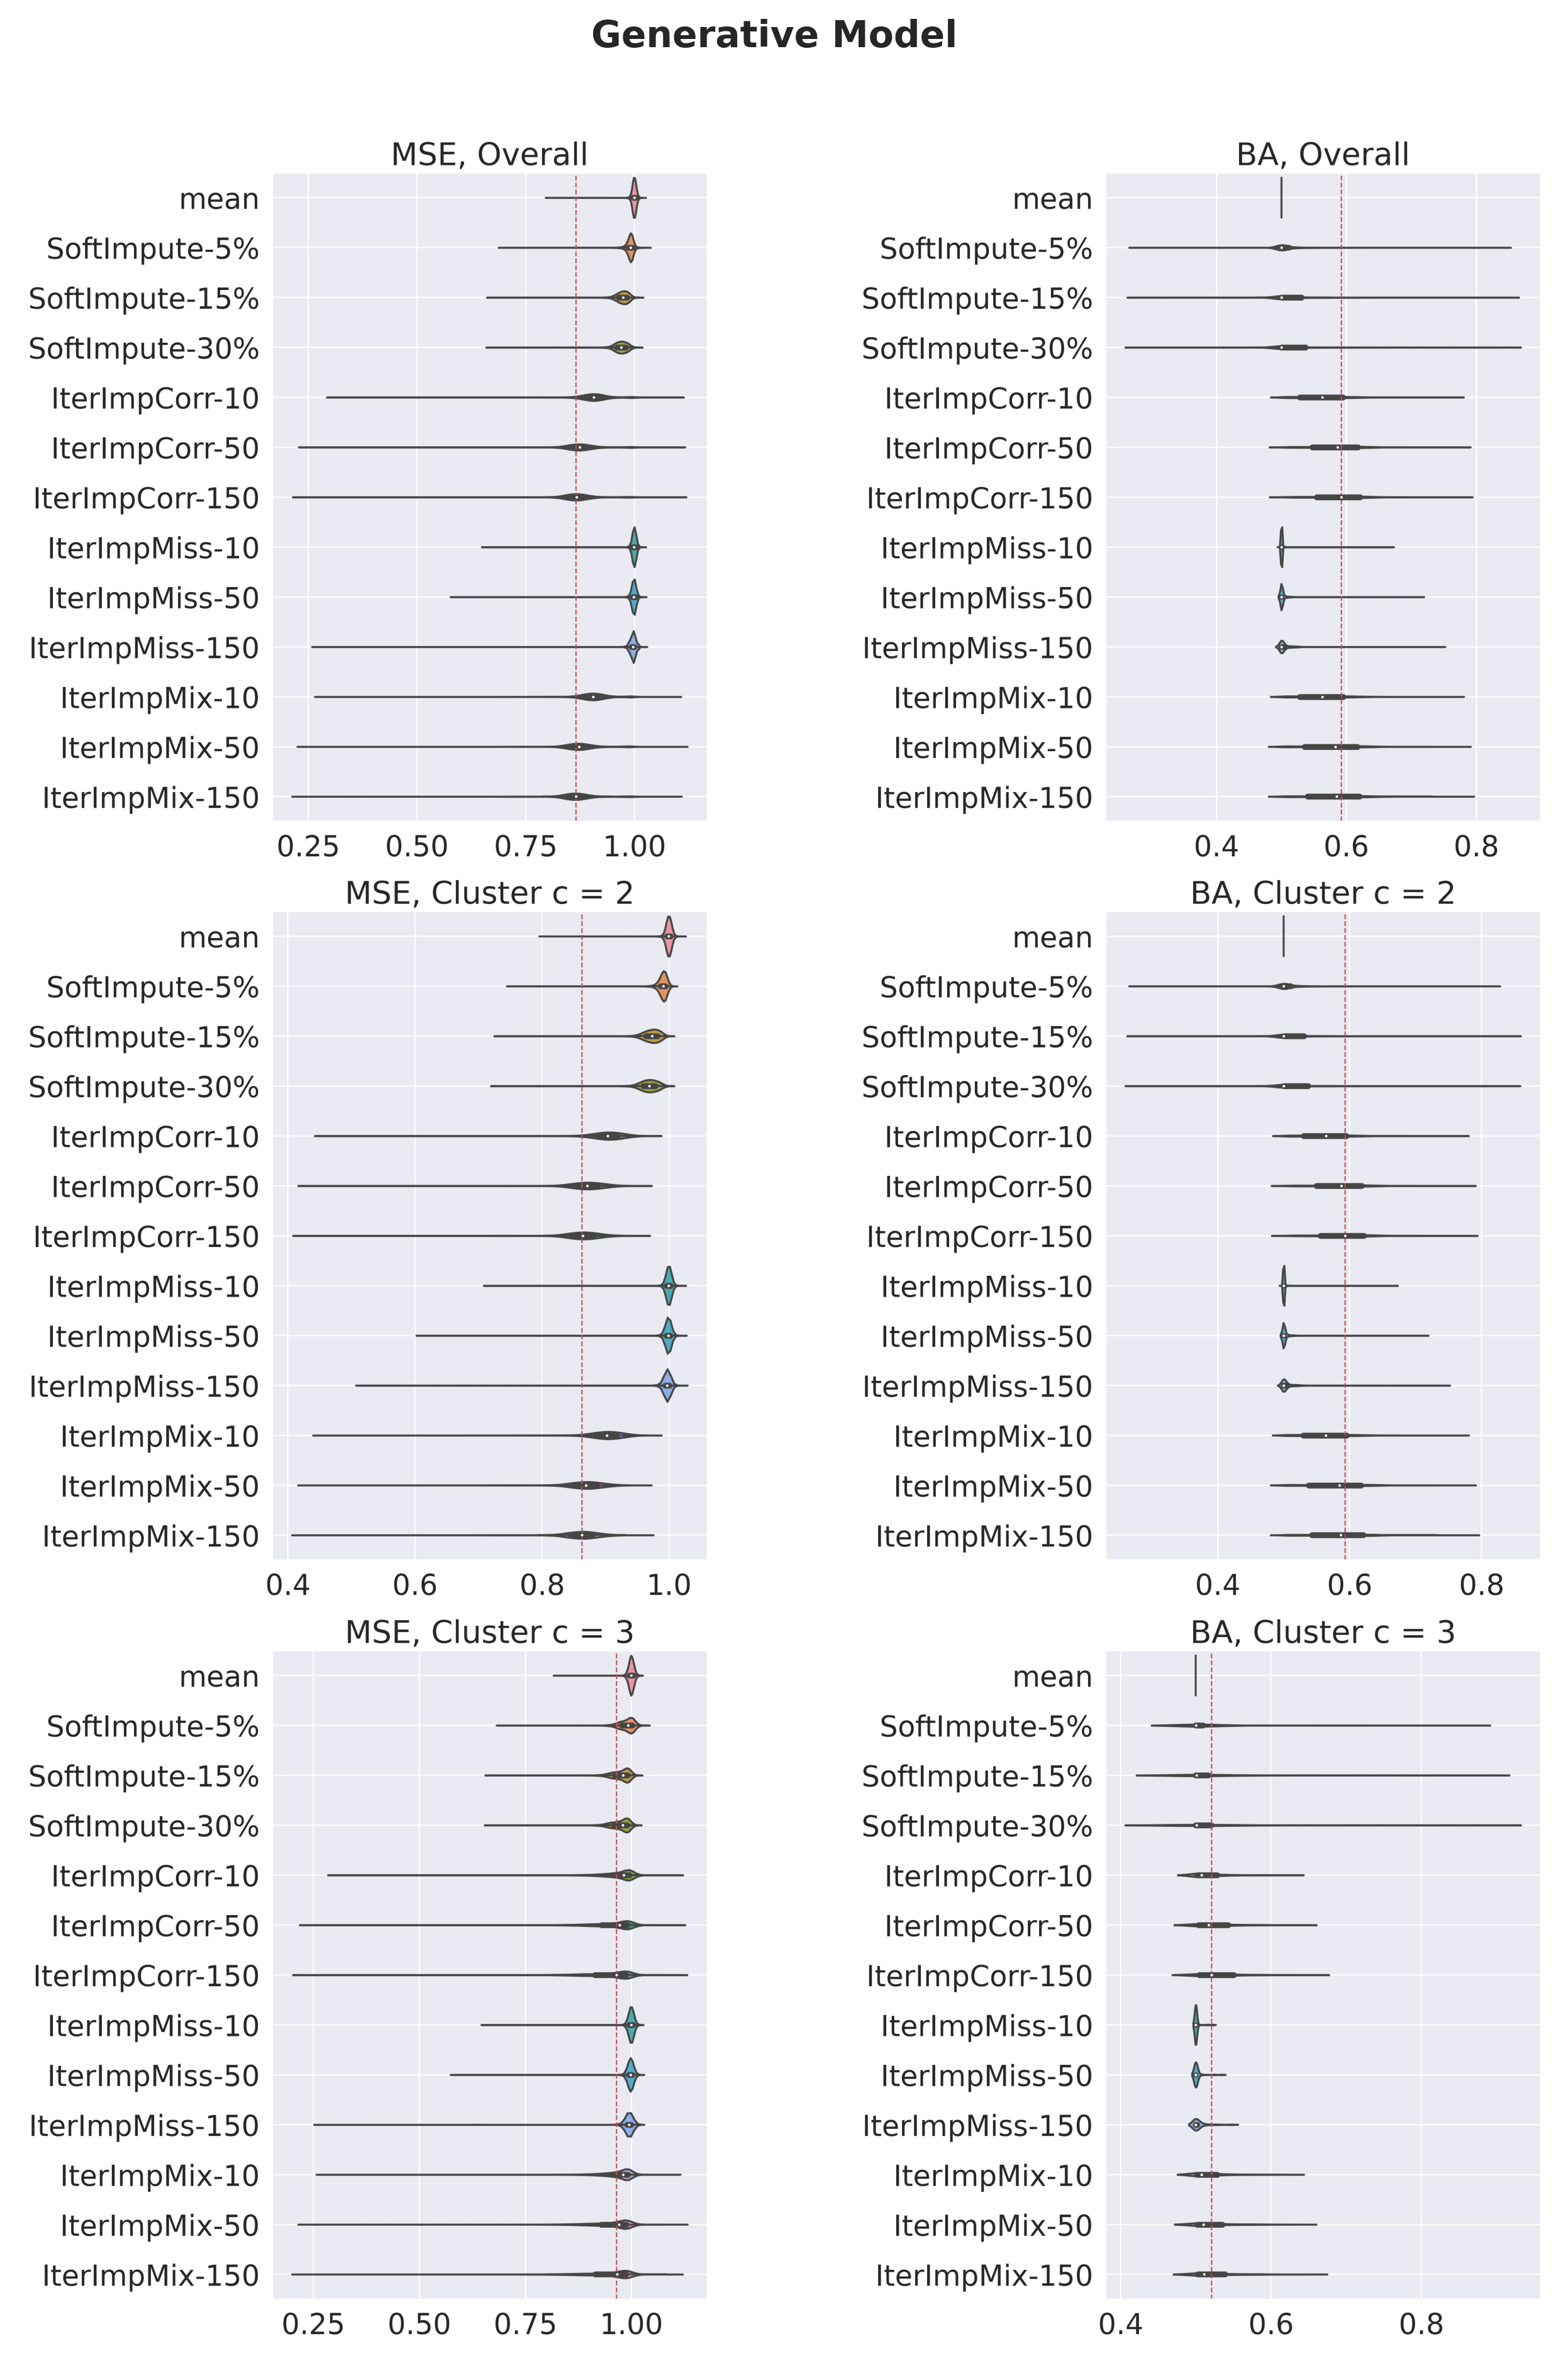

In [8]:
figr, axs = plt.subplots(3, 2 , dpi=300)


fig_inds = [11,10,3,2,7,6]

figr.tight_layout(pad = -2)

for i in range(3):
    for j in range(2):
        my_fig = plt.imread(my_result_directory + 'new_' +output_names[fig_inds[i*2+j]])
        axs[i,j].imshow(my_fig)
        axs[i,j].axis('off')
figr.set_size_inches(8, 12)
plt.suptitle('Generative Model', fontweight ="bold" , fontsize = 14)
figr.subplots_adjust(top=0.93 , hspace = 0)

plt.savefig(my_result_directory + 'violin_comb_plot_new.jpg' , bbox_inches = 'tight', dpi = 300)

plt.subplots_adjust(hspace=0)



In [9]:
my_result_dict = dict()

for i in range(n_metrics):
    temp_df_dict = dict()
    for j in range(n_methods):
        if j<4:
            temp_df = read_r(my_directory +'MCAR_B_' +var_names[i]+ '_' + method_file_names[j]+'_'+str(1)+suffixes[j])[None]
        else:
            temp_df = pd.DataFrame(pickle.load(open(my_directory +'MCAR_B_' +var_names[i]+ '_' + method_file_names[j]+'_'+str(1)+suffixes[j],'rb'))[None])
        if var_names[i][0] == 'R':
            temp_df = temp_df.applymap(lambda t: t**2)
        for k in range(2,n_partial+1):
            if j>=4:
                temp_df = pd.concat([temp_df, pd.DataFrame(pickle.load(open(my_directory +'MCAR_B_' +var_names[i]+ '_' + method_file_names[j]+'_'+str(k)+suffixes[j] , 'rb'))[None])], axis=0)
            else :
                temp_df = pd.concat([temp_df, read_r(my_directory +'MCAR_B_' +var_names[i]+ '_' + method_file_names[j]+'_'+str(k)+suffixes[j])[None]], axis=0)
        temp_df_dict[j] = temp_df
    my_df = temp_df_dict[0]
    for j in range(1 , n_methods):
        my_df = pd.concat([my_df, temp_df_dict[j]], axis=1)
    my_df.columns = method_names
    my_result_dict[i] = my_df

In [10]:
for i in range(n_metrics , n_plots):
    my_result_dict[i] = pd.concat([my_result_dict[i-n_metrics], my_result_dict[i-2*n_metrics + n_plots]], axis=0)

In [11]:
for i in range(n_plots):
    plt.figure(figsize=(6,9))
    my_img = violinplot(my_result_dict[i] , orient = 'h')
    my_img.set_title(title_names[i])
    plt.grid(visible = True)
    if i%4 == 2:
        my_x = my_result_dict[i].median().max()
        plt.axvline(x = my_x, color = 'r', ls = '--'  , lw = 1)
    if i%4 == 3:
        my_x = my_result_dict[i].median().min()
        plt.axvline(x = my_x, color = 'r', ls = '--'  , lw = 1)
    plt.savefig(my_result_directory +'MCAR_B_new_'+ output_names[i] , bbox_inches = 'tight', dpi = 300)
    plt.clf()

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

<Figure size 600x900 with 0 Axes>

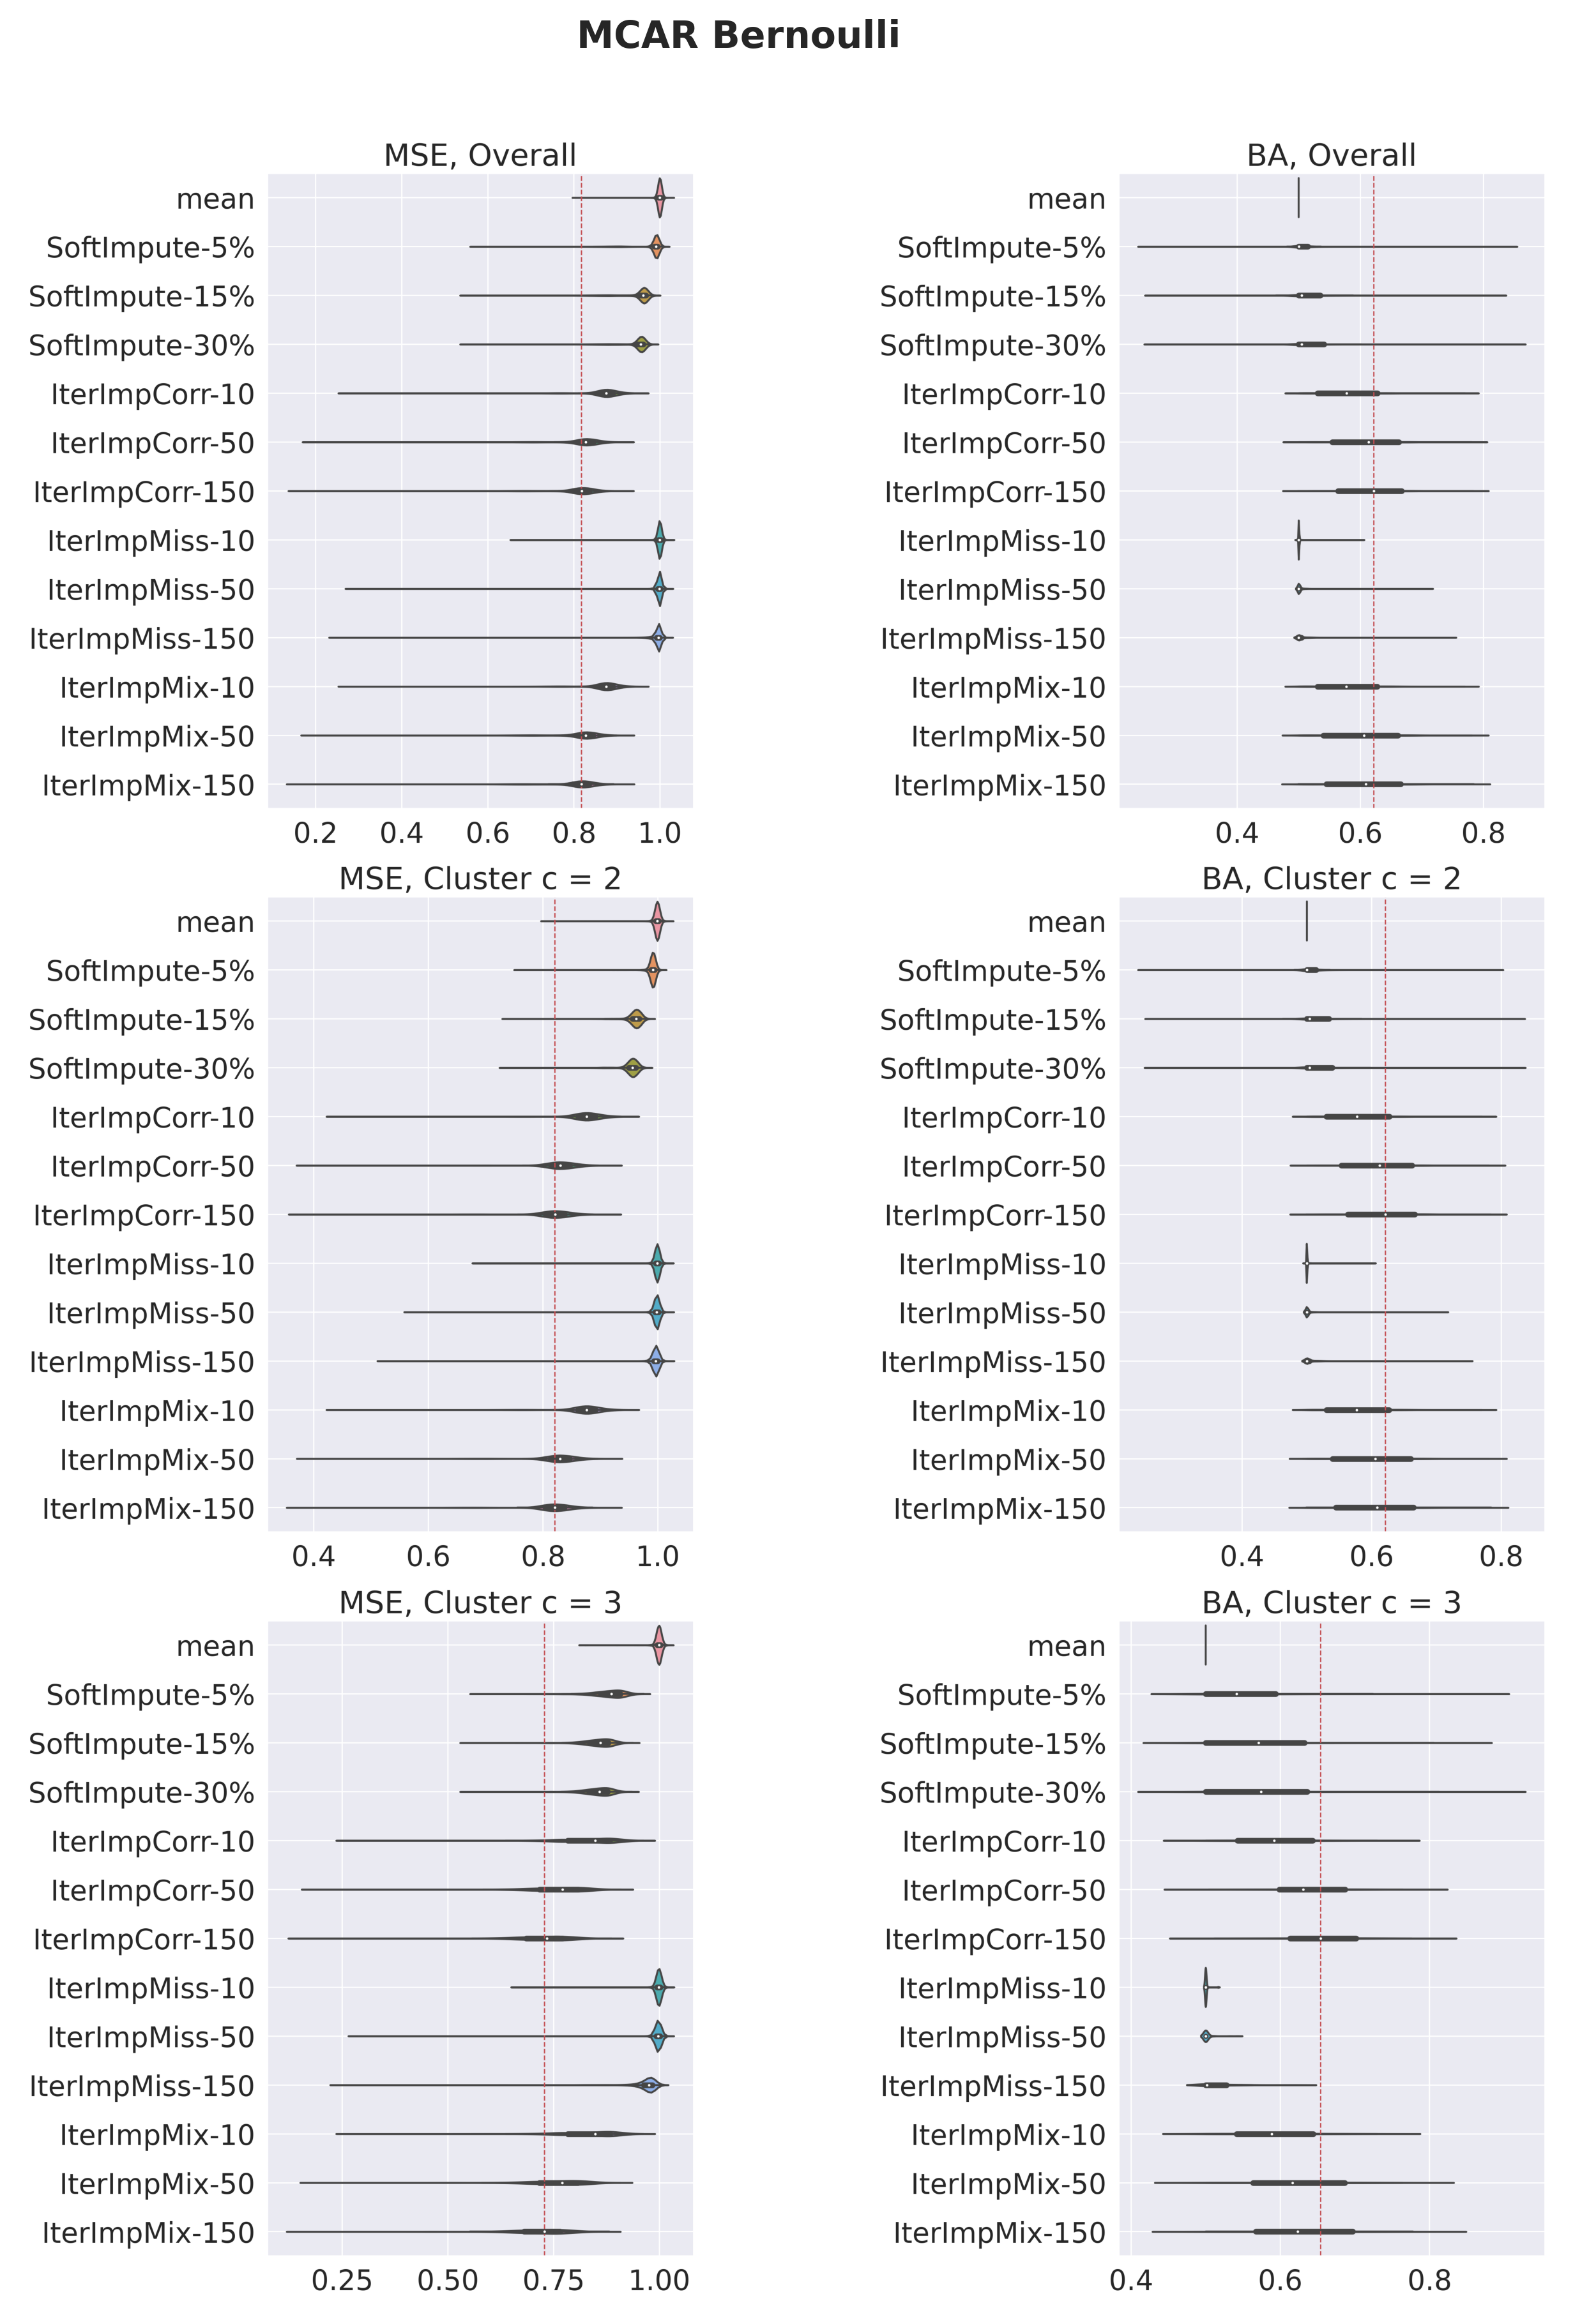

In [12]:
figr, axs = plt.subplots(3, 2, dpi = 300, figsize = (6,16))


fig_inds = [11,10,3,2,7,6]

figr.tight_layout(pad = -2)

for i in range(3):
    for j in range(2):
        my_fig = plt.imread(my_result_directory + 'MCAR_B_new_' +output_names[fig_inds[i*2+j]])
        axs[i,j].imshow(my_fig)
        axs[i,j].axis('off')
figr.set_size_inches(8, 12)
plt.suptitle('MCAR Bernoulli', fontweight ="bold" , fontsize = 14)
figr.subplots_adjust(top=0.93 , hspace = 0)
plt.savefig(my_result_directory + 'MCAR_B_violin_comb_plot_new.jpg' , bbox_inches = 'tight', dpi = 300)





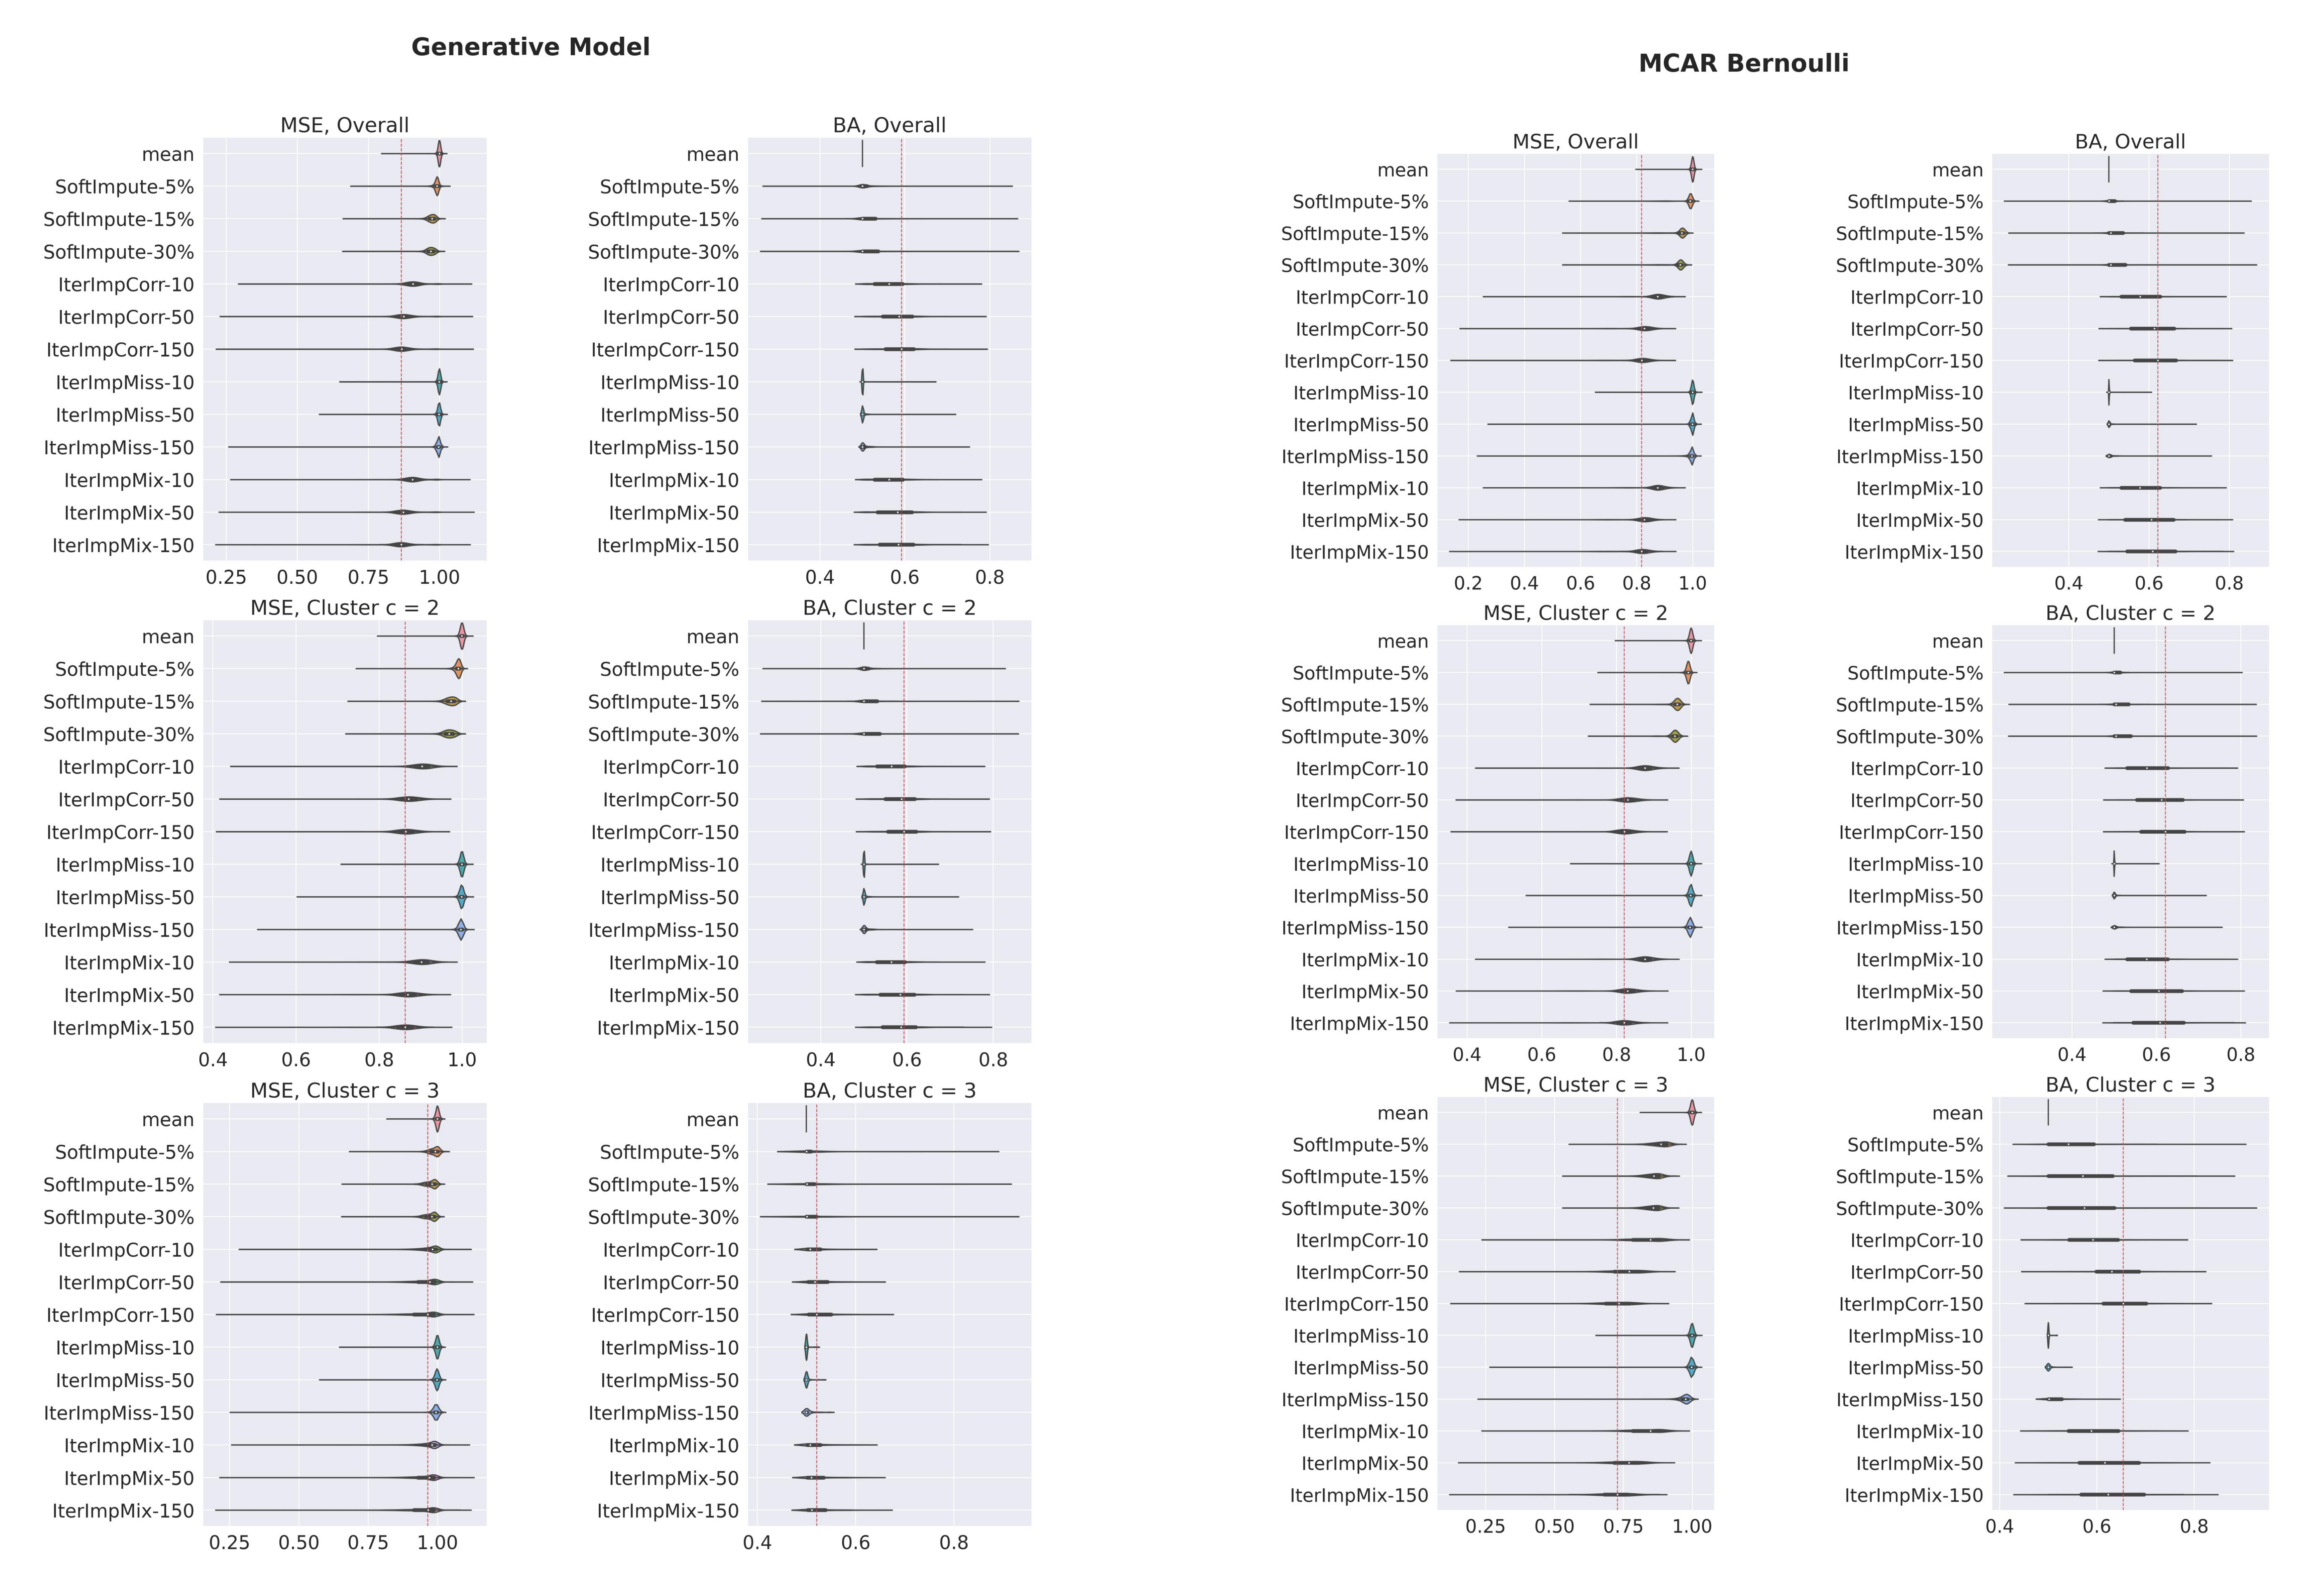

In [13]:
figr, axs = plt.subplots(1, 2, dpi = 600, figsize = (10,14))

my_filenames = [my_result_directory + 'violin_comb_plot_new.jpg' , my_result_directory + 'MCAR_B_violin_comb_plot_new.jpg']
figr.tight_layout(pad = 0)
for i in range(2):
    my_fig = plt.imread(my_filenames[i])
    axs[i].imshow(my_fig)
    axs[i].axis('off')

plt.savefig(my_result_directory + 'violin_comparison.jpg' , bbox_inches = 'tight', dpi = 600)
